In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
clean_df = pd.read_csv("resume_data.csv")

In [3]:
clean_df.head()

,Category,Feature
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...


In [4]:
clean_df.shape

(13389, 2)

In [5]:
from sklearn.utils import resample

max_count = clean_df['Category'].value_counts().max()
balanced_data = []

for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        #oversampling ctg fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        #undersampling ctg more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)



In [6]:
balanced_df.dropna(inplace=True)

In [7]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_test_tfidf

<3526x99826 sparse matrix of type '<class 'numpy.float64'>'
	with 1054283 stored elements in Compressed Sparse Row format>

In [9]:
rf_classifier = RandomForestClassifier()

In [10]:
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [11]:
y_pred = rf_classifier.predict(X_test_tfidf)

In [12]:
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print("Accuracy:", accuracy)

Accuracy: 0.9160521837776517


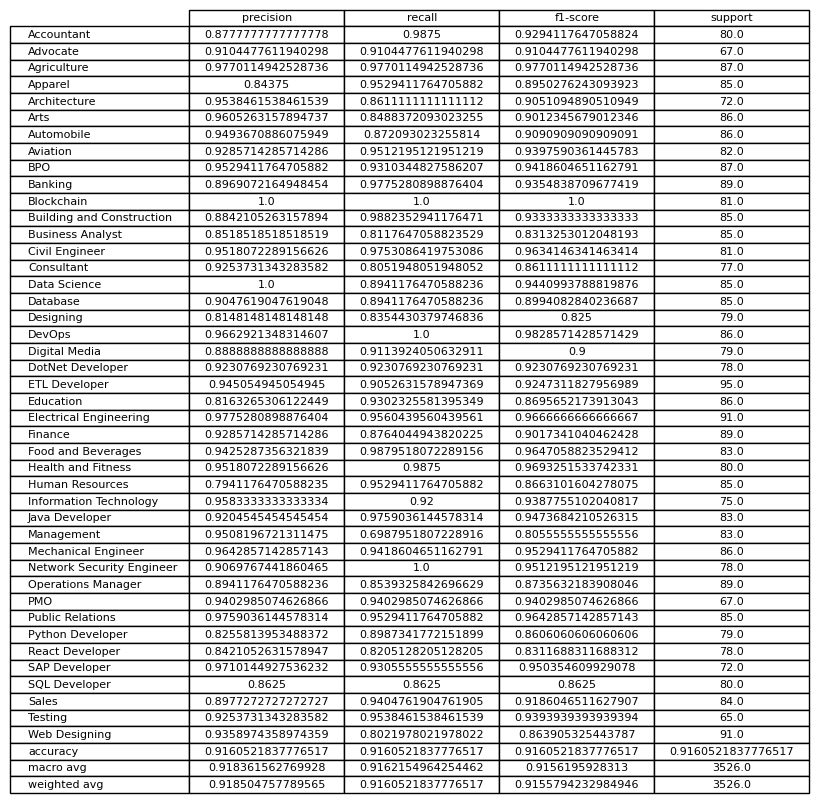

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
label_classes = list(set(y_test))  # Extract unique labels from y_test
report = classification_report(y_test, y_pred, output_dict=True)  # Convert report to dictionary

# Convert classification report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report as a table
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')

# Save classification report as image
plt.savefig("classification_report.png", dpi=300, bbox_inches='tight')  
plt.show()


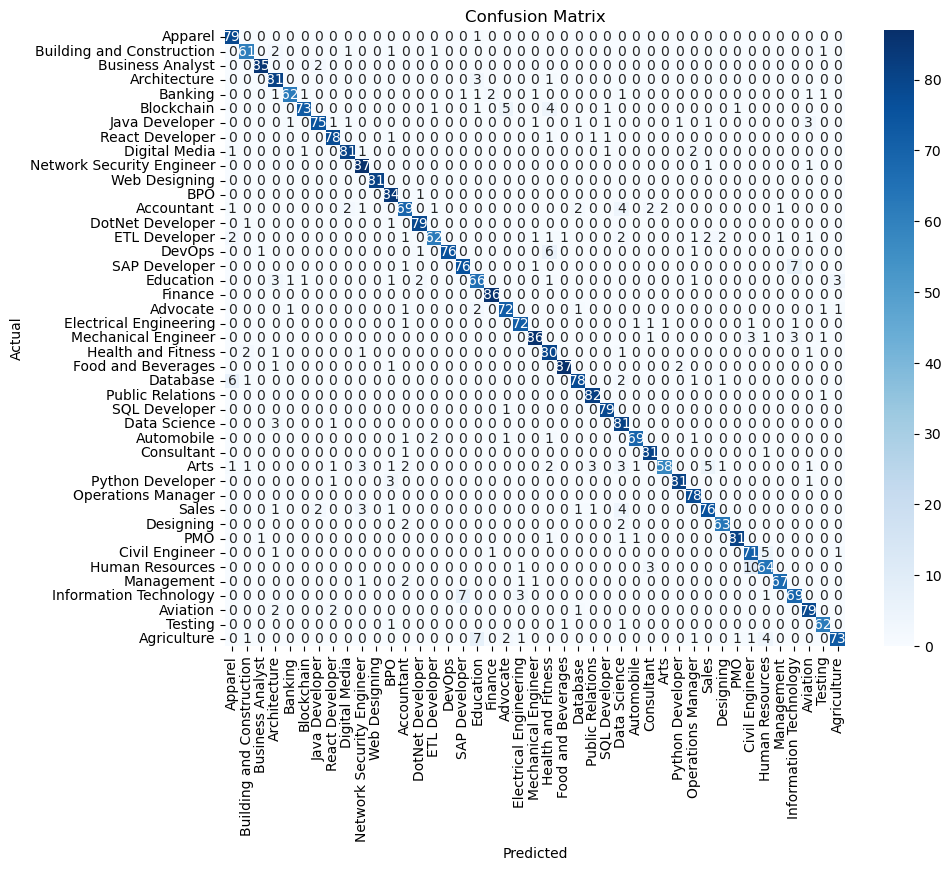

In [15]:
# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("Rfc.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
#cleaning the stop wrd,symb,etc...
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

# Predicting the ctg name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Sathish\AppData\Local\Temp\ipykernel_10380\2773555841.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\Sathish\AppData\Local\Temp\ipykernel_10380\2773555841.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\Sathish\AppData\Local\Temp\ipykernel_10380\2773555841.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\Sathish\AppDa

In [18]:
#sample 2
resume_file = """ lead interaction designer summary senior ux ui designer profile tim involved user centered design years focus human factors usability worked wide variety projects focusing improvement functionality performance expert heuristic evaluation usability developing evaluating user interfaces gui design iterative design methodology human computer interaction hci areas experience usability interaction design usability engineering standards guideline review user interface design standards usability testing focus groups cognitive walkthroughs heuristic evaluation pluralistic walkthroughs website design interaction design personas use cases scenarios contextual inquiries affinity diagrams contextual design ethnography wireframes user flows development software development standards software testing html authoring modeling programming advanced image manipulation analysis interfaces interactive digital prototyping artificial intelligence touch input sql agile development secret military clearance military spa war dod onr contracts cdc nhsn saas training instructional design technical writing editing project management healthcare medical diagnostic imaging systems electronic medical records hipaa fitness equipment highlights user centered design human computer interaction hci innovation development contextual inquiries wireframes user flows prototyping skills user centered design accomplishments innovation tournament award winner leveraging real time algorithmic dashboards rad improve patient care innovation tournament award winner mars medical augmented reality system idea award xe treadmill taiwan excellence silver award xe treadmill patent method controlling exercise apparatus issued february patent method controlling exercise apparatus issued january patent method controlling exercise apparatus issued september experience lead interaction designer current company name city state tim lead interaction designer nine person agile software development team creating software use healthcare facilities role one three bas team conducting user testing interviews data gathering persona development wire framing story writing interface analysis general usability evangelist acts nhsn point contact keeping software compliant evolving cdc requirements team produces incremental updates code base two week sprint cycle velocity team increased steadily last six months tim also serves wellness committee safety committee floor warden first responder vp engineering product development director company name city state tim worked vp engineering product development responsibilities included managing current suite virtual reality software designing future software hardware offerings vendor relations client support systems design sensor design quality control quality assurance technology specialist usability evangelist responsibilities included bringing new technology opportunities company driving new vision company developing line community new products innovation engineer company name city state tim worked innovation engineer bridging gap need technology utilized skills engineer create unique solutions client needs projects included intoxiclock took third generation product migrated simple input device multimedia application netbook upgraded poster sized input panel usb hid device created custom dynamic printouts user data germbot designed uv c retrofit vacuum robot use sterilization floors chemicals sr usability engineer company name city state tim acted resident usability expert development production multitude commercial consumer fitness equipment primary innovator migration platform consoles primitive led displays winning advanced guis utilizing lcd displays innovative advances allowed matrix fitness expand markets taking market share away competitors positioning matrix new market innovator product beat tim produced interactive prototypes interfaces conducted user testing validate designs developed many tools applications aid production testing new guis created multi screen interactive kiosk used numerous tradeshows selling tool new technologies helped develop tim also active developing relationships clients vendors possible business partners johnson people companies brought best buy itech fitness lance armstrong popcap software konami softkinetics big rooster nec lg dewar sharp amtouch immersion ra sports datamodule tim also served lead poc partners itech fitness fitlinxx polar virtual active avnet eurotech also engendered relationships asian counter parts china taiwan semi annual trips overseas tim also listed several pending awarded patents applied johnson sr usability specialist company name city state tim worked sole user centered design person small team developing product emerging medical field market responsible aspects ucd process monitored adherence iec usability requirements interacted marketing engineering team clinical contacts develop personas workflows task lists use cases well requirements engineering team used macromedia director create high fidelity prototype product assisted engineering team porting flex gathered data prepared third phase project involved observational research affinity diagramming task analysis ui design human factors usability engineer company name city state tim worked human factors usability design specialist well systems engineer taking account workflow perception usability feedback aesthetics electronic oral feedback device responsible design implementation clinical testing analysis software tim interacted senior members team define develop data visualization software following predefined standards requirements proposed designed patient tracking database allow cross referencing multiple factors adhering security privacy regulations designing creating software dynamically mapping sensitivity tongue gui design workflow interlocks eliminate user error strict adhesion standardized data collection procedures designing creating software visualization collected data sitting design sessions acting resident human factors advocate gui design workflow dynamic data analysis visualization spacial temporal visualization interviewed users determine usage linking multiple data sources designing creating image projection software gui design workflow image processing interpolation projection designing creating software dynamically stimulating tongue electrostatic tactor array gui design human computer interaction hci safety interlocks control correct data input dynamic stimuli manipulation developed evaluated user interface design user interface compliance using iterative design methodology user feedback designing developing subject database track subjects allow analysis subject data multiple factors gui design subject confidentiality data integrity robust system recovery project manager human factors usability engineer consultant company name city state tim worked human factors specialist defining gui standards look feel conforming existing software specifications responsible aspects software development cycle inception delivery defined user interface palm windows ce devices detailed requirements gathering review client needs application functionality product manager sr engineer company name city state tim responsible aspects development cycle video pics paparazzi pics products included defining products means prototypes concepts generating product specifications also acted human factors advocate aid design process tim served following project areas used human factors usability design principles including heuristic evaluation designing prototyping next generation videopics product macromedia director defined executed qa qc process involved setting qa bugs database running compatibility testing establishing version control heading customer service faqs evaluated allocated resources including hardware media site web hosting programming staff established milestones meet promised deadlines product delivery interfaced marketing group define products viable market place created demos helped collateral materials shows set online store allowed users purchase product purchase made information entered customer database product shipped shippingdepartment managed many rd party relations oem bundling back end print services strategic partners scientist company name city state tim worked human factors usability engineer many projects designed programmed tactical graphics application tacgraph global wargames tim also designed implemented stimuli experiments research conducted interfaces experiments ranged basic shape recognition determining routes terrain tim also developed gui based version text based nurses orders system va hospital replace dated command line system designed prototyped user interfaces tactical situation awareness tool tacsat conducted interviews marines camp pendleton integrated new design ideas tacsat design implementation experiment based tacsat simulated real engagement determine experience affected decision making process worked team human factors phds determine benefits interfaces experiments tested object recognition spatial relationships occlusion depth field perspective depth cues factors worked team human factors phds develop experiments shared awareness data integrity reliability multimodal perception worked closely principal investigators spawar dod nima dnr secret military clearance designed implemented gui text based nurses orders system gather performance behavioral data new system increased efficiency reduced error software engineer human factors usability engineer company name city state tim worked person team rework graphical user interface gui internet tv set top box extreme time constraints role primarily prototyping user centered design gui also served lead prototype engineer project manager graphical adventure game timelapse worked team talented designers engineers artists cross platform interactive edutainment titles acted usability human factors evangelist project involved ran focus groups rolled field trial austin tx collected analyzed data online usage attempt better understand users assembled numerous conceptual prototypes presentation gte vps assisted game design titles produced distributed gteim established processing methods converting rendered images created alias animations created photoshop director usable assets designed prototyped coded product demos used retail trade shows acted lead puzzle prototyper timelapse worked chief technologist timelapse responsibilities included investigating current emergent technologies determining applicable game traveled knoxville tn manage engineering team cyberflix weeks establish game requirements duties also included training use production tools establishing minimum system requirement testing new game engines establishing asset needs communicating gte entertainment carlsbad ca status engineering efforts worked liaison marketing department production team designed developed area using onlive traveler studio max education b degree cognitive science june university california city state usa cognitive science affiliations chi ux community human factors ergonomics society hfes ixda madison user experience group publications holste kobus proctor bank liebhaber decision making dynamic uncertain environment san diego ca pacific science engineering group inc manuscript preparation kobus proctor bank e holste effects experience uncertainty dynamic decision making proceedings th annual meeting human factors ergonomics society santa monica ca human factors ergonomics society proctor bank e holste kobus tacsat demonstration user manual san diego ca pacific science engineering group st john proctor callan j bank command post situation awareness tool cpsa evaluation presented apa division human factors ergonomics society midyear symposium san diego ca smallman h st john bank cowen b effects motion parallax drop lines object size localizing tracks displayed perspective view spawar systems center san diego ca technical report preparation st john smallman h bank cowen b tactical route planning using two dimensional three dimensional views terrain spawar systems center san diego ca technical report press
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)


Predicted Category: Mechanical Engineer


In [19]:
#sample 3
resume_file = """Objective:
Dedicated and driven legal professional with a passion for advocating for justice and defending the rights of clients. Seeking a challenging position as an Advocate in a reputable law firm where I can apply my expertise in litigation, negotiation, and legal research to provide effective representation and achieve favorable outcomes for clients. Committed to upholding the principles of integrity, professionalism, and ethical conduct in all legal proceedings.

Education:
- Juris Doctor (JD), Law School, XYZ University
- Bachelor of Arts in Political Science, ABC College, GPA: 3.7/4.0
- Licensed Attorney, State Bar Association

Skills:
- Extensive experience in civil and criminal litigation, representing clients in court hearings, trials, and appellate proceedings
- Strong research and analytical skills, conducting legal research, drafting legal documents, and preparing persuasive arguments
- Excellent oral and written communication skills, articulating legal concepts and arguments effectively to judges, juries, and opposing counsel
- Proven track record of negotiating favorable settlements and agreements on behalf of clients, resolving disputes through mediation and arbitration
- Ability to work collaboratively with clients, colleagues, and experts to develop comprehensive legal strategies and achieve successful outcomes

Experience:
Associate Attorney | Law Firm LLP
- Handled a diverse caseload of civil and criminal matters, including personal injury, family law, employment law, and criminal defense
- Conducted legal research, drafted pleadings, motions, briefs, and other legal documents, and prepared for court hearings and trials
- Represented clients in negotiations, mediations, and settlement conferences, securing favorable outcomes and settlements
- Assisted senior attorneys in trial preparation, witness preparation, and courtroom presentations, contributing to successful trial outcomes

Legal Intern | Public Defender's Office
- Assisted attorneys in the defense of indigent clients in criminal cases, conducting legal research, drafting motions, and preparing for court appearances
- Interviewed clients, witnesses, and law enforcement officers, gathering evidence and information to support defense strategies
- Observed courtroom proceedings, including arraignments, hearings, and trials, and assisted in trial preparation and case management
- Participated in client counseling sessions, explaining legal rights, options, and potential outcomes to clients facing criminal charges

Law Clerk | Legal Aid Organization
- Provided legal assistance to low-income individuals and families in civil matters, such as landlord-tenant disputes, consumer rights, and family law matters
- Conducted intake interviews, assessed clients' legal needs, and provided information about available legal services and resources
- Drafted legal documents, including pleadings, petitions, and correspondence, and assisted clients in completing court forms and applications
- Collaborated with attorneys and social workers to address clients' legal and non-legal needs, connecting them with community resources and support services

Certifications:
- Certified Mediator, State Bar Association
- Trial Advocacy Certificate, Law School

Languages:
- English (Native)
- Spanish (Proficient) """
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Advocate


In [20]:
#sample rsm
resume_file = """hr assistant summary hard worker dedicated detailed oriented experienced organized highly motivated many attributes possess individual years experience human resource administration customer service talent quickly adapt new challenges experience focused benefits administration payroll career development employment law highlights assigned administrative assignments daily basis implemented employee handbook processed documentation employees conducted employees performance reviews managed employee scheduling coordinated upper level co worker lower level teamwork oriented processed new recruits processed payroll performed check managed inventory supplies secured new wholesale food purveyor decrease costs increase profits accomplishments accomplishments pho n restaurant managed restaurant financial objectives developing financing establishing banking relationships prepared strategic annual forecasts budgets analyzing variances initiating corrective actions establishing financial controls developed implemented strategies increase average meal checks created restaurant business plan surveying restaurant demand conferring people community identifying evaluating competitors preparing financial marketing sales projections analyses estimates controlled purchases inventory meeting account manager negotiating prices contracts developing preferred supplier lists reviewing evaluating usage reports analyzing variances taking corrective actions contributed team effort inspired team members motivation provided high level customer service maintain high profile day day operations handled complaints contentious issues settled directly team members provides fast solution accomplished campaign recycle program divide right trash right bin accomplishments dr norman g mckoy associates demonstrated success administrative employee handbook developing team building programs corporate policies job descriptions management reports organized office documents patients charts organized office woking areas welcomed new employees organization conducting orientation organized employees document pockets maintained employees confidence protect operation keeping human resource information confidential maintained employee information entering updating employment status change data provided payroll information collecting time attendance records provided secretarial support entering formatting printing information organizing work answering telephone relaying messages maintaining equipment supplies experience company name city state hr assistant increased productivity physician office organizing patients charts converting digital files streamline patient maintenance processed pay roll paychex includes ensured vacation sick time tracked system answered payroll questions facilited resolutions payroll errors processed incoming mails going mails successfully edited employee handbook define job descriptions create office policies patient managing proper patient reports wrote employee handbook covering issues including disciplinary procedures code conduct fmla policy benefits information wrote standard operations procedures manual sops detailed aspect employee expectations designed implement overall recruiting strategy coordinated office manager recruit right candidates administering interviews conducting background checks processed documentation prepared reports relating personnel activities staffing recruitment training performance evaluations etc identified reduced business expenses increase profits controlling budget compares actual results budget expectations company name city state general manager current hostess waitress promoted interview recruit new hires order sustain longer hours operation thus increased company profitswas successful ensuring successful integration new hires implementing training compensation structures ordered foods supplies restaurant checked maintained inventory handling daily accounting processing payroll processed cost reduction thought venders whole sale increased marketability restaurant designing creating new modernized menu prepared willing step restaurant short staff low turn order increase productivity provide best service maintained great quality quantity foods restaurant created recycle program divided recyclable bin non recyclable waste bin education bachelor arts humanities english university thai chamber commerce city thailand humanities english excelled language culture transportation management critical reading article writing advanced technical reading master science human resource management strayer university city state usa human resource management magna cum laude excelled human resources law management ethical hr information systems hris strategic management registered professional human resources aphr certification hr designations registering aphr professional human resources exam expect complete aphr certification professional affiliations enrolling ongoing training areas compensation benefits employee labor relations leaves absence workers compensation workplace safety security member society human resource management shrm skills human resource management skills employment law hr policies procedures training development performance management employee relations mediation benefits administration orientation boarding organizational development staff life cycle computer skills hris applications peoplesoft enterprise human resources ms office word excel powerpoint access outlook e mailing tools ms outlook windows outlook yahoo google networking skills job boards networking sites soft skills professional communication skills interpersonal skills bilingual thai english excellent adaptability new environments hard working flexible reliable honest polite shape decision making excellent customer service skills creative
"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Human Resources


In [21]:
#realtime sample 4
resume_file = """ SUMMARY OF QUALIFICATIONS
Exceptionally well organized and resourceful Professional with more than six years experience and a
solid academic background in accounting and financial management; excellent analytical and problem
solving skills; able to handle multiple projects while producing high quality work in a fast-paced,
deadline-oriented environment.
EDUCATION
Bachelor of Science, Bellevue University, Bellevue, NE (In Progress)
Major: Accounting Minor: Computer Information Systems
Expected Graduation Date: January, 20xx GPA to date: 3.95/4.00
PROFESSIONAL ACCOMPLISHMENTS
Accounting and Financial Management
 Developed and maintained accounting records for up to fifty bank accounts.
 Formulated monthly and year-end financial statements and generated various payroll records,
including federal and state payroll reports, annual tax reports, W-2 and 1099 forms, etc.
 Tested accuracy of account balances and prepared supporting documentation for submission during a
comprehensive three-year audit of financial operations.
 Formulated intricate pro-forma budgets.
 Calculated and implemented depreciation/amortization schedules.
Information Systems Analysis and Problem Solving
 Converted manual to computerized accounting systems for two organizations.
 Analyzed and successfully reprogrammed software to meet customer requirements.
 Researched and corrected problems to assure effective operation of newly computerized systems"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Accountant


In [22]:
#realtime sample 4
resume_file = """  
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Data Science


In [23]:
#realtime sample 5
resume_file = """ SUMMARY OF QUALIFICATIONS
Exceptionally well organized and resourceful Professional with more than six years experience and a
solid academic background in accounting and financial management; excellent analytical and problem
solving skills; able to handle multiple projects while producing high quality work in a fast-paced,
deadline-oriented environment.
EDUCATION
Bachelor of Science, Bellevue University, Bellevue, NE (In Progress)
Major: Accounting Minor: Computer Information Systems
Expected Graduation Date: January, 20xx GPA to date: 3.95/4.00
PROFESSIONAL ACCOMPLISHMENTS
Accounting and Financial Management
 Developed and maintained accounting records for up to fifty bank accounts.
 Formulated monthly and year-end financial statements and generated various payroll records,
including federal and state payroll reports, annual tax reports, W-2 and 1099 forms, etc.
 Tested accuracy of account balances and prepared supporting documentation for submission during a
comprehensive three-year audit of financial operations.
 Formulated intricate pro-forma budgets.
 Calculated and implemented depreciation/amortization schedules.
Information Systems Analysis and Problem Solving
 Converted manual to computerized accounting systems for two organizations.
 Analyzed and successfully reprogrammed software to meet customer requirements.
 Researched and corrected problems to assure effective operation of newly computerized systems"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Accountant


In [21]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer_categorization.pkl','wb'))